In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import itertools
import random
random.seed(108448)
from scipy.stats import poisson

#%pip install gurobipy
import gurobipy as gp
from gurobipy import GRB

Data generation

In [2]:
#Define the number of elements in each set I, J, K
i_num = 30
k_num = 2
j_num = 500 #Without I and K, so real j_num_real = j_num + i_num + k_num
degree_to_m = 111111

#Define empty data frames
I = pd.DataFrame(columns = ['Point number', 'Latitude', 'Longitude'])
J = pd.DataFrame(columns = ['Point number', 'Latitude', 'Longitude'])
K = pd.DataFrame(columns = ['Point number', 'Latitude', 'Longitude'])



In [3]:
#Define sets of I, J, K, where J contains I and K

for i in range(i_num):
    I.loc[i, 'Point number'] = 'i'+ str(i)
    I.loc[i, 'Latitude'] = round(random.uniform(0, 25000), 0)
    I.loc[i, 'Longitude'] = round(random.uniform(0, 25000), 0)

I.index = I['Point number']
    
    
for k in range(k_num):
    K.loc[k, 'Point number'] = 'k'+ str(k)
    K.loc[k, 'Latitude'] = round(random.uniform(0, 25000), 0)
    K.loc[k, 'Longitude'] = round(random.uniform(0, 25000), 0)

K.index = K['Point number']


for j in range(j_num):
    J.loc[j, 'Point number'] = 'j'+ str(j)
    J.loc[j, 'Latitude'] = round(random.uniform(0, 25000), 0)
    J.loc[j, 'Longitude'] = round(random.uniform(0, 25000), 0)

J.index = J['Point number'] 
J = pd.concat([J, K, I], axis = 0) #Include K to J
J

In [4]:
### PASSAU  ###

#Define sets of I, J, K, where J contains I and K for Passau

#Define the number of elements in each set I, J, K

degree_to_m = 111111

#Define empty data frames
I_coordinates = pd.DataFrame(columns = ['Point number', 'Latitude', 'Longitude'])
J_coordinates = pd.DataFrame(columns = ['Point number', 'Latitude', 'Longitude'])
K_coordinates = pd.DataFrame(columns = ['Point number', 'Latitude', 'Longitude'])

column_types = {
    'Name': 'str',  # Example: 'int', 'float', 'str', 'datetime64[ns]', etc.
    'Latitude': 'float',
    'Longitude': 'float',
    'Address': 'str'
    # Add more columns and their data types as needed
}

doctors = pd.read_csv('Doctors coordinates.txt', sep = ';', index_col = False, dtype=column_types)

doctors

for i in range(len(doctors['Latitude'])):
    I_coordinates.loc[i, 'Point number'] = 'i'+ str(i)
    I_coordinates.loc[i, 'Latitude'] = doctors.loc[i, 'Latitude']
    I_coordinates.loc[i, 'Longitude'] = doctors.loc[i, 'Longitude']

I_coordinates.index = I_coordinates['Point number']

I = I_coordinates * degree_to_m
I['Point number'] = I_coordinates['Point number']


labs = pd.read_csv('Labs coordinates.txt', sep = ';', index_col = False, dtype=column_types) 
labs

for k in range(len(labs['Latitude'])):
    K_coordinates.loc[k, 'Point number'] = 'k'+ str(k)
    K_coordinates.loc[k, 'Latitude'] = labs.loc[k, 'Latitude']
    K_coordinates.loc[k, 'Longitude'] = labs.loc[k, 'Longitude']

K_coordinates.index = K_coordinates['Point number']

K = K_coordinates * degree_to_m
K['Point number'] = K_coordinates['Point number']


#Define range of coordinates

combined_coordinates = pd.concat([I_coordinates, K_coordinates])

min_latitude = combined_coordinates['Latitude'].min()
max_latitude = combined_coordinates['Latitude'].max()
min_longitude = combined_coordinates['Longitude'].min()
max_longitude = combined_coordinates['Longitude'].max()

grid_spacing = 0.0018

# Create grid points
grid_points = []
for lat in np.arange(min_latitude, max_latitude + grid_spacing, grid_spacing):
    for lon in np.arange(min_longitude, max_longitude + grid_spacing, grid_spacing):
        grid_points.append((round(lat, 6), round(lon, 6)))

J_coordinates = pd.DataFrame(grid_points, columns=['Latitude', 'Longitude'])
J_coordinates['Point number'] = ['j' + str(i) for i in range(len(J_coordinates))]

J_coordinates.index = J_coordinates['Point number'] 
J_coordinates = pd.concat([J_coordinates, K_coordinates, I_coordinates], axis = 0) #Include K to J

river = ['j972', 'j973', 'j918', 'j919', 'j920', 'j866', 'j867', 'j813', 'j814',
'j815', 'j760', 'j761', 'j762', 'j707', 'j708', 'j709', 'j710', 'j654',
'j655', 'j656', 'j657', 'j658', 'j606', 'j610', 'j611', 'j612', 'j613', 'j614',
'j615', 'j616', 'j620', 'j621', 'j622', 'j623', 'j624', 'j625', 'j682', 'j683',
'j684','j685','j686', 'j635', 'j636', 'j637', 'j638', 'j585', 'j586', 'j587', 
'j588', 'j589', 'j590', 'j591', 'j592','j593', 'j531', 'j530', 'j529', 'j528',
'j527', 'j22', 'j23', 'j77', 'j132', 'j133', 'j134', 'j189', 'j190', 'j244',
'j245', 'j300', 'j301', 'j356', 'j411', 'j412', 'j467', 'j523', 'j524', 'j525', 'j526',

'j246', 'j247', 'j191', 'j192', 'j193', 'j194', 'j135', 'j136', 'j137', 'j138', 'j139',
'j140', 'j141', 'j78', 'j79', 'j80', 'j81', 'j82', 'j83', 'j84', 'j85', 'j86', 'j87', 'j88',
'j24', 'j25', 'j26', 'j27', 'j28', 'j29', 'j30', 'j31', 'j32', 'j33', 'j34', 'j35', 'j36',
 'j261', 'j262', 'j263', 'j264', 'j266', 'j267', 'j268', 'j269', 'j206', 'j207', 'j208',
'j209', 'j210', 'j211', 'j212', 'j213', 'j214', 'j215', 'j153', 'j154', 'j155', 'j156',
'j157', 'j158', 'j159', 'j160', 'j161', 'j98', 'j99', 'j100', 'j101', 'j102', 'j103', 
'j104', 'j105', 'j106', 'j107', 'j43', 'j44', 'j45', 'j46', 'j47', 'j48', 'j49', 'j50', 
'j51', 'j52', 'j53'
 ]

J_coordinates = J_coordinates.drop(index = river) #excluding locations on the river

J = J_coordinates * degree_to_m
J['Point number'] = J_coordinates['Point number']
J


Latitude       Longitude Point number
Point number                                             
j0            5395057.382715  1488454.289322           j0
j1            5395057.382715  1488654.289122           j1
j2            5395057.382715  1488854.288922           j2
j3            5395057.382715  1489054.288722           j3
j4            5395057.382715  1489254.288522           j4
...                      ...             ...          ...
i72           5396271.431962  1494016.582913          i72
i73           5396276.176425  1494035.132745          i73
i74           5397218.901411  1495210.024008          i74
i75           5397141.730722  1495460.689703          i75
i76           5397159.445319  1496899.447286          i76

[1048 rows x 3 columns]

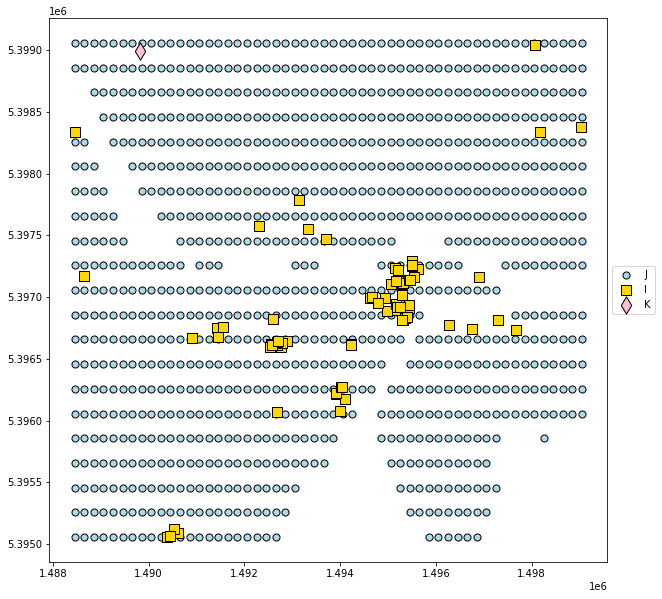

In [5]:
axs, fig = plt.subplots(1, 1, figsize = (10, 10))

fig.scatter(J['Longitude'], J['Latitude'], color = 'lightblue', edgecolors = 'black',
            marker = 'o', s = 50, label = 'J')
fig.scatter(I['Longitude'], I['Latitude'], color = 'gold', edgecolors = 'black',
            marker = 's', s = 100, label = 'I')
fig.scatter(K['Longitude'], K['Latitude'], color = 'pink', edgecolors = 'black',
            marker = 'd', s = 150, label = 'K')
fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [6]:
from pathlib import Path
import pandas as pd
import geopandas as gpd
import shapely
#%pip install folium matplotlib mapclassify
import folium
import matplotlib



with open('Polygon Passau.txt', 'r') as file:
    # Read the contents of the file into a string
    polygon_str = file.read()

# Making Passau polygon

passau_map = folium.Map(location=[48.565, 13.433], zoom_start=12)

passau_poly = shapely.wkt.loads(polygon_str)
passau_gdf = gpd.GeoDataFrame(geometry=[passau_poly], crs="epsg:4326")
folium.GeoJson(passau_gdf).add_to(passau_map)


# Assuming I_coordinates is your DataFrame with doctor coordinates
geo_doctors = gpd.GeoDataFrame(I_coordinates, geometry=gpd.points_from_xy(I_coordinates["Latitude"], I_coordinates["Longitude"]), crs="epsg:4326")

for idx, row in geo_doctors.iterrows():
    coordinates_label = f"Loc: {row['Point number']}, Lat: {row['Latitude']}, Long: {row['Longitude']}"
    folium.Marker([row['Latitude'], row['Longitude']], 
                  icon=folium.Icon(icon='circle', prefix='fa', color='orange', size = 0.1), 
                  popup=folium.Popup(coordinates_label, parse_html=True)).add_to(passau_map)
    
geo_labs = gpd.GeoDataFrame(K_coordinates, geometry=gpd.points_from_xy(K_coordinates["Latitude"], K_coordinates["Longitude"]), crs="epsg:4326")

for idx, row in geo_labs.iterrows():
    coordinates_label = f"Loc: {row['Point number']}, Lat: {row['Latitude']}, Long: {row['Longitude']}"
    folium.Marker([row['Latitude'], row['Longitude']], 
                  icon=folium.Icon(icon='circle', prefix='fa', color='red'), size = 0.1, 
                  popup=folium.Popup(coordinates_label, parse_html=True)).add_to(passau_map)
    
geo_bases = gpd.GeoDataFrame(J_coordinates, geometry=gpd.points_from_xy(J_coordinates["Latitude"], J_coordinates["Longitude"]), crs="epsg:4326")

for idx, row in geo_bases.iterrows():
    coordinates_label = f"Loc: {row['Point number']}, Lat: {row['Latitude']}, Long: {row['Longitude']}"
    folium.CircleMarker([row['Latitude'], row['Longitude']],  
                  popup=folium.Popup(coordinates_label, parse_html=True)).add_to(passau_map)


#Custom legend

legend_html = '''
     <div style="position: fixed; 
                 bottom: 100px; right: 100px; width: 300px; height: 150px; 
                 border:2px solid grey; z-index:9999; font-size:16px;
                 background-color:white; opacity: 0.9;
                 ">
     &nbsp; <i class="fa fa-map-marker fa-3x" style="color:orange"></i> Doctors &nbsp; <br>
     &nbsp; <i class="fa fa-map-marker fa-3x" style="color:red"></i> Laboratories &nbsp; <br>
     &nbsp; <svg height="40" width="40">
          <circle cx="20" cy="20" r="18" fill="none" stroke="#3388FF" stroke-width="2" />
        </svg> Bases &nbsp; 
      </div>
     '''



# Add the legend to the map
passau_map.get_root().html.add_child(folium.Element(legend_html))

passau_map

In [7]:
#Define constants

B = 91800 #battery load: meters of travel
S = 5100 #meters of service time

p = 0.98

alpha = 15900 #euro

beta = {}
for j in J.index:
    if j.startswith('j'):
        beta[j] = 203000
    else:
        beta[j] = 76920
        
gamma = 0.0045 / 1000 # variable cost in euro per m
        
q_j = {}
for j in J.index:
    if j.startswith('j'):
        q_j[j] = 255
    else:
        q_j[j] = 45



softlimit = 200
hardlimit = 10000


In [8]:
up_bound = 10
mu = {i : int(round(random.uniform(1, up_bound), 0)) for i in I.index}
# mu = {'i0': 3,
#  'i1': 9, 'i2': 4, 'i3': 6, 'i4': 5, 'i5': 10, 'i6': 5, 'i7': 9, 'i8': 2, 'i9': 8, 'i10': 7, 'i11': 9, 'i12': 5, 'i13': 5, 'i14': 6, 'i15': 5, 'i16': 6, 'i17': 3, 'i18': 2,
#  'i19': 3, 'i20': 10, 'i21': 6, 'i22': 3, 'i23': 3, 'i24': 5, 'i25': 4, 'i26': 7, 'i27': 8, 'i28': 6, 'i29': 3, 'i30': 6, 'i31': 9, 'i32': 4, 'i33': 8, 'i34': 6, 'i35': 3,
#  'i36': 1, 'i37': 2, 'i38': 2, 'i39': 6, 'i40': 9, 'i41': 8, 'i42': 3, 'i43': 3, 'i44': 9, 'i45': 3, 'i46': 9, 'i47': 2, 'i48': 8, 'i49': 8, 'i50': 10, 'i51': 10, 'i52': 9,
#  'i53': 10, 'i54': 8, 'i55': 5, 'i56': 8, 'i57': 8, 'i58': 1, 'i59': 5, 'i60': 6, 'i61': 2, 'i62': 8, 'i63': 2, 'i64': 3, 'i65': 4, 'i66': 10, 'i67': 7, 'i68': 3, 'i69': 5,
#  'i70': 5, 'i71': 2, 'i72': 8, 'i73': 2, 'i74': 2, 'i75': 9, 'i76': 9}

Deterministic model

In [9]:
theta_det = {}
for n in I.index:
    theta_det[n] = list(poisson.rvs(mu[n], size = 1))[0]
theta_det

# theta_det = {'i0': 2, 'i1': 14, 'i2': 4, 'i3': 7, 'i4': 4, 'i5': 9, 'i6': 8, 'i7': 13, 'i8': 2, 'i9': 6, 'i10': 10, 'i11': 14, 'i12': 9, 'i13': 3, 'i14': 5, 'i15': 8, 'i16': 6,
#  'i17': 1, 'i18': 1, 'i19': 2, 'i20': 6, 'i21': 5, 'i22': 3, 'i23': 3, 'i24': 4, 'i25': 8, 'i26': 12, 'i27': 8, 'i28': 5, 'i29': 3, 'i30': 4, 'i31': 6, 'i32': 3, 'i33': 9, 'i34': 7,
#  'i35': 3, 'i36': 0, 'i37': 2, 'i38': 0, 'i39': 9, 'i40': 11, 'i41': 8, 'i42': 6, 'i43': 7, 'i44': 4, 'i45': 1, 'i46': 5, 'i47': 4, 'i48': 5, 'i49': 8, 'i50': 3, 'i51': 6, 'i52': 10,
#  'i53': 14, 'i54': 5, 'i55': 12, 'i56': 7, 'i57': 10, 'i58': 1, 'i59': 9, 'i60': 2, 'i61': 1, 'i62': 10, 'i63': 3, 'i64': 3, 'i65': 3, 'i66': 7, 'i67': 10, 'i68': 3, 'i69': 5,
#  'i70': 4, 'i71': 1, 'i72': 7, 'i73': 1, 'i74': 1, 'i75': 15, 'i76': 7}

{'i0': 9,
 'i1': 2,
 'i2': 4,
 'i3': 6,
 'i4': 1,
 'i5': 4,
 'i6': 8,
 'i7': 5,
 'i8': 8,
 'i9': 3,
 'i10': 10,
 'i11': 6,
 'i12': 2,
 'i13': 4,
 'i14': 8,
 'i15': 13,
 'i16': 1,
 'i17': 7,
 'i18': 4,
 'i19': 4,
 'i20': 6,
 'i21': 9,
 'i22': 7,
 'i23': 7,
 'i24': 9,
 'i25': 12,
 'i26': 11,
 'i27': 13,
 'i28': 9,
 'i29': 11,
 'i30': 9,
 'i31': 6,
 'i32': 3,
 'i33': 6,
 'i34': 3,
 'i35': 4,
 'i36': 4,
 'i37': 4,
 'i38': 1,
 'i39': 4,
 'i40': 9,
 'i41': 6,
 'i42': 8,
 'i43': 4,
 'i44': 1,
 'i45': 5,
 'i46': 9,
 'i47': 8,
 'i48': 3,
 'i49': 7,
 'i50': 0,
 'i51': 9,
 'i52': 9,
 'i53': 3,
 'i54': 12,
 'i55': 2,
 'i56': 5,
 'i57': 3,
 'i58': 10,
 'i59': 0,
 'i60': 4,
 'i61': 4,
 'i62': 8,
 'i63': 7,
 'i64': 8,
 'i65': 2,
 'i66': 8,
 'i67': 1,
 'i68': 7,
 'i69': 6,
 'i70': 4,
 'i71': 8,
 'i72': 4,
 'i73': 3,
 'i74': 4,
 'i75': 3,
 'i76': 7}

In [10]:
#Define distance matrices

def distance(point1, PointsSet1, point2, PointsSet2):
    c1 = np.array((PointsSet1.loc[point1, 'Longitude'], PointsSet1.loc[point1, 'Latitude']))
    c2 = np.array((PointsSet2.loc[point2, 'Longitude'], PointsSet2.loc[point2, 'Latitude']))
    return np.linalg.norm(c1-c2)

dist_JI = {(c1, c2): distance(c1, J, c2, I)for c1, c2 in itertools.product(J.index, I.index)}
dist_IK = {(c1, c2): distance(c1, I, c2, K)for c1, c2 in itertools.product(I.index, K.index)}
dist_KJ = {(c1, c2): distance(c1, K, c2, J)for c1, c2 in itertools.product(K.index, J.index)}
 
dist_KJ


{('k0', 'j0'): 4161.767129977308,
 ('k0', 'j1'): 4100.403874253124,
 ('k0', 'j2'): 4048.0017366376105,
 ('k0', 'j3'): 4004.912486890546,
 ('k0', 'j4'): 3971.439264987311,
 ('k0', 'j5'): 3947.826678479448,
 ('k0', 'j6'): 3934.2522759915905,
 ('k0', 'j7'): 3930.820054260468,
 ('k0', 'j8'): 3937.556535061752,
 ('k0', 'j9'): 3954.409750473379,
 ('k0', 'j10'): 3981.2512257417548,
 ('k0', 'j11'): 4017.880785974353,
 ('k0', 'j12'): 4064.0337766969537,
 ('k0', 'j13'): 4119.390113349927,
 ('k0', 'j14'): 4183.584481493972,
 ('k0', 'j15'): 4256.2170012381475,
 ('k0', 'j16'): 4336.8637342508355,
 ('k0', 'j17'): 4425.086527661631,
 ('k0', 'j18'): 4520.441830742323,
 ('k0', 'j19'): 4622.488264231352,
 ('k0', 'j20'): 4730.792851181433,
 ('k0', 'j21'): 4844.9359220345705,
 ('k0', 'j37'): 7200.099425282223,
 ('k0', 'j38'): 7368.475561592201,
 ('k0', 'j39'): 7538.397197655254,
 ('k0', 'j40'): 7709.762146619819,
 ('k0', 'j41'): 7882.476276227165,
 ('k0', 'j42'): 8056.452815794278,
 ('k0', 'j54'): 3973.41

In [11]:
#Define set L
L = list()
for k, j in itertools.product(K.index, J.index):
    if dist_KJ[(k, j)] <= 0.5*B:
        L.append((k, j))
        
L

[('k0', 'j0'),
 ('k0', 'j1'),
 ('k0', 'j2'),
 ('k0', 'j3'),
 ('k0', 'j4'),
 ('k0', 'j5'),
 ('k0', 'j6'),
 ('k0', 'j7'),
 ('k0', 'j8'),
 ('k0', 'j9'),
 ('k0', 'j10'),
 ('k0', 'j11'),
 ('k0', 'j12'),
 ('k0', 'j13'),
 ('k0', 'j14'),
 ('k0', 'j15'),
 ('k0', 'j16'),
 ('k0', 'j17'),
 ('k0', 'j18'),
 ('k0', 'j19'),
 ('k0', 'j20'),
 ('k0', 'j21'),
 ('k0', 'j37'),
 ('k0', 'j38'),
 ('k0', 'j39'),
 ('k0', 'j40'),
 ('k0', 'j41'),
 ('k0', 'j42'),
 ('k0', 'j54'),
 ('k0', 'j55'),
 ('k0', 'j56'),
 ('k0', 'j57'),
 ('k0', 'j58'),
 ('k0', 'j59'),
 ('k0', 'j60'),
 ('k0', 'j61'),
 ('k0', 'j62'),
 ('k0', 'j63'),
 ('k0', 'j64'),
 ('k0', 'j65'),
 ('k0', 'j66'),
 ('k0', 'j67'),
 ('k0', 'j68'),
 ('k0', 'j69'),
 ('k0', 'j70'),
 ('k0', 'j71'),
 ('k0', 'j72'),
 ('k0', 'j73'),
 ('k0', 'j74'),
 ('k0', 'j75'),
 ('k0', 'j76'),
 ('k0', 'j89'),
 ('k0', 'j90'),
 ('k0', 'j91'),
 ('k0', 'j92'),
 ('k0', 'j93'),
 ('k0', 'j94'),
 ('k0', 'j95'),
 ('k0', 'j96'),
 ('k0', 'j97'),
 ('k0', 'j108'),
 ('k0', 'j109'),
 ('k0', 'j110'),

In [12]:
#Define set P
P = list()
for i, k in itertools.product(I.index, K.index):
    if dist_IK[(i, k)] <= 0.5*B:
        P.append((i, k))
        
P

[('i0', 'k0'),
 ('i1', 'k0'),
 ('i2', 'k0'),
 ('i3', 'k0'),
 ('i4', 'k0'),
 ('i5', 'k0'),
 ('i6', 'k0'),
 ('i7', 'k0'),
 ('i8', 'k0'),
 ('i9', 'k0'),
 ('i10', 'k0'),
 ('i11', 'k0'),
 ('i12', 'k0'),
 ('i13', 'k0'),
 ('i14', 'k0'),
 ('i15', 'k0'),
 ('i16', 'k0'),
 ('i17', 'k0'),
 ('i18', 'k0'),
 ('i19', 'k0'),
 ('i20', 'k0'),
 ('i21', 'k0'),
 ('i22', 'k0'),
 ('i23', 'k0'),
 ('i24', 'k0'),
 ('i25', 'k0'),
 ('i26', 'k0'),
 ('i27', 'k0'),
 ('i28', 'k0'),
 ('i29', 'k0'),
 ('i30', 'k0'),
 ('i31', 'k0'),
 ('i32', 'k0'),
 ('i33', 'k0'),
 ('i34', 'k0'),
 ('i35', 'k0'),
 ('i36', 'k0'),
 ('i37', 'k0'),
 ('i38', 'k0'),
 ('i39', 'k0'),
 ('i40', 'k0'),
 ('i41', 'k0'),
 ('i42', 'k0'),
 ('i43', 'k0'),
 ('i44', 'k0'),
 ('i45', 'k0'),
 ('i46', 'k0'),
 ('i47', 'k0'),
 ('i48', 'k0'),
 ('i49', 'k0'),
 ('i50', 'k0'),
 ('i51', 'k0'),
 ('i52', 'k0'),
 ('i53', 'k0'),
 ('i54', 'k0'),
 ('i55', 'k0'),
 ('i56', 'k0'),
 ('i57', 'k0'),
 ('i58', 'k0'),
 ('i59', 'k0'),
 ('i60', 'k0'),
 ('i61', 'k0'),
 ('i62', 'k0'),
 (

In [13]:
#Define sets M_kj

M_kj = {}
M_interim = []

for (k, j) in L:
    for i in I.index:
        if dist_JI[j, i] <= S:
            if dist_JI[j, i] + dist_IK[i, k] + dist_KJ[k, j] <= B:
                M_interim.append(i)
    M_kj[(k, j)] = M_interim
    M_interim = []

M_kj_final = {key : val for key, val in M_kj.items() if val != []}  

KJ_feas = list(M_kj_final.keys())
KJ_feas


[('k0', 'j0'),
 ('k0', 'j1'),
 ('k0', 'j2'),
 ('k0', 'j3'),
 ('k0', 'j4'),
 ('k0', 'j5'),
 ('k0', 'j6'),
 ('k0', 'j7'),
 ('k0', 'j8'),
 ('k0', 'j9'),
 ('k0', 'j10'),
 ('k0', 'j11'),
 ('k0', 'j12'),
 ('k0', 'j13'),
 ('k0', 'j14'),
 ('k0', 'j15'),
 ('k0', 'j16'),
 ('k0', 'j17'),
 ('k0', 'j18'),
 ('k0', 'j19'),
 ('k0', 'j20'),
 ('k0', 'j21'),
 ('k0', 'j37'),
 ('k0', 'j38'),
 ('k0', 'j39'),
 ('k0', 'j40'),
 ('k0', 'j41'),
 ('k0', 'j42'),
 ('k0', 'j54'),
 ('k0', 'j55'),
 ('k0', 'j56'),
 ('k0', 'j57'),
 ('k0', 'j58'),
 ('k0', 'j59'),
 ('k0', 'j60'),
 ('k0', 'j61'),
 ('k0', 'j62'),
 ('k0', 'j63'),
 ('k0', 'j64'),
 ('k0', 'j65'),
 ('k0', 'j66'),
 ('k0', 'j67'),
 ('k0', 'j68'),
 ('k0', 'j69'),
 ('k0', 'j70'),
 ('k0', 'j71'),
 ('k0', 'j72'),
 ('k0', 'j73'),
 ('k0', 'j74'),
 ('k0', 'j75'),
 ('k0', 'j76'),
 ('k0', 'j89'),
 ('k0', 'j90'),
 ('k0', 'j91'),
 ('k0', 'j92'),
 ('k0', 'j93'),
 ('k0', 'j94'),
 ('k0', 'j95'),
 ('k0', 'j96'),
 ('k0', 'j97'),
 ('k0', 'j108'),
 ('k0', 'j109'),
 ('k0', 'j110'),

In [14]:
#Define sets N_i

N_i = {}
N_interim = []

for i in I.index:
    for (k, j) in L:
        if dist_JI[j, i] <= S:
            if dist_JI[j, i] + dist_IK[i, k] + dist_KJ[k, j] <= B:
                N_interim.append((k, j))
    N_i[i] = N_interim
    N_interim = []
    
N_i_final = {key : val for key, val in N_i.items() if val != []}   
 
I_feas = list(N_i_final.keys())
N_i

{'i0': [('k0', 'j37'),
  ('k0', 'j38'),
  ('k0', 'j39'),
  ('k0', 'j40'),
  ('k0', 'j41'),
  ('k0', 'j42'),
  ('k0', 'j89'),
  ('k0', 'j90'),
  ('k0', 'j91'),
  ('k0', 'j92'),
  ('k0', 'j93'),
  ('k0', 'j94'),
  ('k0', 'j95'),
  ('k0', 'j96'),
  ('k0', 'j97'),
  ('k0', 'j142'),
  ('k0', 'j143'),
  ('k0', 'j144'),
  ('k0', 'j145'),
  ('k0', 'j146'),
  ('k0', 'j147'),
  ('k0', 'j148'),
  ('k0', 'j149'),
  ('k0', 'j150'),
  ('k0', 'j151'),
  ('k0', 'j152'),
  ('k0', 'j195'),
  ('k0', 'j196'),
  ('k0', 'j197'),
  ('k0', 'j198'),
  ('k0', 'j199'),
  ('k0', 'j200'),
  ('k0', 'j201'),
  ('k0', 'j202'),
  ('k0', 'j203'),
  ('k0', 'j204'),
  ('k0', 'j205'),
  ('k0', 'j248'),
  ('k0', 'j249'),
  ('k0', 'j250'),
  ('k0', 'j251'),
  ('k0', 'j252'),
  ('k0', 'j253'),
  ('k0', 'j254'),
  ('k0', 'j255'),
  ('k0', 'j256'),
  ('k0', 'j257'),
  ('k0', 'j258'),
  ('k0', 'j259'),
  ('k0', 'j260'),
  ('k0', 'j265'),
  ('k0', 'j302'),
  ('k0', 'j303'),
  ('k0', 'j304'),
  ('k0', 'j305'),
  ('k0', 'j306'),
 

In [15]:
#Define sets O_j

O_j = {}
O_interim = []

for j in J.index:
    for (i, k) in P:
        if dist_JI[j, i] <= S:
            if dist_JI[j, i] + dist_IK[i, k] + dist_KJ[k, j] <= B:
                O_interim.append((i, k))
    O_j[j] = O_interim
    O_interim = []
    
O_j_final = {key : val for key, val in O_j.items() if val != []}   
 
J_feas = list(O_j_final.keys())
J_feas

['j0',
 'j1',
 'j2',
 'j3',
 'j4',
 'j5',
 'j6',
 'j7',
 'j8',
 'j9',
 'j10',
 'j11',
 'j12',
 'j13',
 'j14',
 'j15',
 'j16',
 'j17',
 'j18',
 'j19',
 'j20',
 'j21',
 'j37',
 'j38',
 'j39',
 'j40',
 'j41',
 'j42',
 'j54',
 'j55',
 'j56',
 'j57',
 'j58',
 'j59',
 'j60',
 'j61',
 'j62',
 'j63',
 'j64',
 'j65',
 'j66',
 'j67',
 'j68',
 'j69',
 'j70',
 'j71',
 'j72',
 'j73',
 'j74',
 'j75',
 'j76',
 'j89',
 'j90',
 'j91',
 'j92',
 'j93',
 'j94',
 'j95',
 'j96',
 'j97',
 'j108',
 'j109',
 'j110',
 'j111',
 'j112',
 'j113',
 'j114',
 'j115',
 'j116',
 'j117',
 'j118',
 'j119',
 'j120',
 'j121',
 'j122',
 'j123',
 'j124',
 'j125',
 'j126',
 'j127',
 'j128',
 'j129',
 'j130',
 'j131',
 'j142',
 'j143',
 'j144',
 'j145',
 'j146',
 'j147',
 'j148',
 'j149',
 'j150',
 'j151',
 'j152',
 'j162',
 'j163',
 'j164',
 'j165',
 'j166',
 'j167',
 'j168',
 'j169',
 'j170',
 'j171',
 'j172',
 'j173',
 'j174',
 'j175',
 'j176',
 'j177',
 'j178',
 'j179',
 'j180',
 'j181',
 'j182',
 'j183',
 'j184',
 'j185',

In [16]:
model_det = gp.Model('Deterministic model without relaxation')

x_ikj = model_det.addVars(I.index, L, vtype = GRB.INTEGER, name = 'x_ikj')
y_j = model_det.addVars(J.index, vtype = GRB.BINARY, name = 'y_j')

In [17]:
model_det.addConstrs((gp.quicksum(x_ikj[i, k, j] for (k, j) in N_i_final[i]) >= theta_det[i] for i in I_feas), name = 'c2')
model_det.addConstrs((gp.quicksum(x_ikj[i, k, j] for (i, k) in O_j_final[j]) <= q_j[j] * y_j[j] for j in J_feas), name = 'c4')
model_det.addConstrs(((dist_JI[(j, i)] + dist_IK[(i, k)] + dist_KJ[(k, j)]) * x_ikj[i, k, j] <= B * x_ikj[i, k, j]
                  for i in I_feas for (k, j) in KJ_feas), name = 'c5')
model_det.addConstrs((dist_JI[(j, i)] * x_ikj[i, k, j] <= S * x_ikj[i, k, j] for i in I_feas for (k, j) in KJ_feas), name = 'c6')

{('i0', 'k0', 'j0'): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 'k0', 'j1'): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 'k0', 'j2'): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 'k0', 'j3'): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 'k0', 'j4'): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 'k0', 'j5'): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 'k0', 'j6'): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 'k0', 'j7'): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 'k0', 'j8'): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 'k0', 'j9'): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 'k0', 'j10'): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 'k0', 'j11'): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 'k0', 'j12'): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 'k0', 'j13'): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 'k0', 'j14'): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 'k0', 'j15'): <gurobi.Constr *Awaiting Model Update*>,
 (

In [18]:
model_det.setObjective(gp.quicksum(alpha * x_ikj[i, k, j] + gamma * (dist_JI[(j, i)] + dist_IK[(i, k)] + dist_KJ[(k, j)]) * x_ikj[i, k, j] for i in I_feas for (k, j) in KJ_feas) + gp.quicksum(beta[j] * y_j[j] for j in J_feas), GRB.MINIMIZE)

def softtime(model, where):
    if where == GRB.Callback.MIP:
        runtime = model.cbGet(GRB.Callback.RUNTIME)
        objbst = model.cbGet(GRB.Callback.MIP_OBJBST)
        objbnd = model.cbGet(GRB.Callback.MIP_OBJBND)
        gap = abs((objbst - objbnd) / objbst)

        if runtime > softlimit and gap < 0.5:
            model.terminate()
            
model_det.setParam('TimeLimit', hardlimit)
model_det.optimize(softtime)

Set parameter TimeLimit to value 10000
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: 11th Gen Intel(R) Core(TM) i5-1145G7 @ 2.60GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 162517 rows, 81744 columns and 291062 nonzeros
Model fingerprint: 0x2a40f1ac
Variable types: 0 continuous, 81744 integer (1048 binary)
Coefficient statistics:
  Matrix range     [8e-03, 9e+04]
  Objective range  [2e+04, 2e+05]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+01]
Found heuristic solution: objective 2.049982e+07
Presolve removed 161394 rows and 18129 columns
Presolve time: 0.92s
Presolved: 1123 rows, 63615 columns, 126182 nonzeros
Variable types: 0 continuous, 63615 integer (5056 binary)
Found heuristic solution: objective 1.989082e+07
Deterministic concurrent LP optimizer: primal and dual simplex
Showing first log only...

Concurrent spin time: 0.02s

Solved with pri

In [19]:
def ListSolution(model):
        nSolutions = model.SolCount
        print('Number of solutions found: ' + str(nSolutions))
        for e in range(nSolutions):
        #for iter2 in range(1):
                model.setParam(GRB.Param.SolutionNumber, e)
                print(e)
                print('%g ' % model.PoolObjVal, end='\n')
                for v in model.getVars():
                        if v.X > 0:
                                print ('%s %g' % (v.varName, int(v.X)))
                                #print(v)
                print("\n")
                
        print("\n")
        
ListSolution(model_det)

Number of solutions found: 10
0
7.52922e+06 
x_ikj[i0,k0,j676] 9
x_ikj[i1,k0,j676] 2
x_ikj[i2,k0,j676] 4
x_ikj[i3,k0,j676] 6
x_ikj[i4,k0,j676] 1
x_ikj[i5,k0,j676] 4
x_ikj[i6,k0,j676] 8
x_ikj[i7,k0,j676] 5
x_ikj[i8,k0,j676] 8
x_ikj[i9,k0,j676] 3
x_ikj[i10,k0,j1034] 10
x_ikj[i11,k0,j1034] 6
x_ikj[i12,k0,j1034] 2
x_ikj[i13,k0,j1034] 4
x_ikj[i14,k0,j1034] 8
x_ikj[i15,k0,j1034] 13
x_ikj[i16,k0,j1034] 1
x_ikj[i17,k0,j1034] 7
x_ikj[i18,k0,j1034] 4
x_ikj[i19,k0,j1034] 4
x_ikj[i20,k0,j1034] 6
x_ikj[i21,k0,j1034] 9
x_ikj[i22,k0,j676] 7
x_ikj[i23,k0,j1034] 7
x_ikj[i24,k0,j1034] 9
x_ikj[i25,k0,j1034] 12
x_ikj[i26,k0,j676] 11
x_ikj[i27,k0,j676] 13
x_ikj[i28,k0,j676] 9
x_ikj[i29,k0,j676] 11
x_ikj[i30,k0,j676] 9
x_ikj[i31,k0,j676] 6
x_ikj[i32,k0,j1034] 3
x_ikj[i33,k0,j1034] 6
x_ikj[i34,k0,j676] 3
x_ikj[i35,k0,j676] 4
x_ikj[i36,k0,j676] 4
x_ikj[i37,k0,j676] 4
x_ikj[i38,k0,j676] 1
x_ikj[i39,k0,j676] 4
x_ikj[i40,k0,j676] 9
x_ikj[i41,k0,j676] 6
x_ikj[i42,k0,j676] 8
x_ikj[i43,k0,j676] 4
x_ikj[i44,k0,j1034

In [20]:
def SolutionSummary(model):
    n = -1
    results = pd.DataFrame(columns = ['i', 'k', 'j', 'Number of drones'])
    for opt_sol in range(1):
        for v in model.getVars():
            if v.varName.startswith('x_ikj'):
                if v.X > 0:
                    n += 1
                    indices = v.varName[6:-1].split(',') #drop variable name and brackets and convert to a list of indices
                    results.loc[n, 'i'] = indices[0]
                    results.loc[n, 'k'] = indices[1]
                    results.loc[n, 'j'] = indices[2]
                    results.loc[n, 'Number of drones'] = int(v.X)
    results_doctors = results.groupby('i', as_index = False)['Number of drones'].sum()
    results_locations = results.groupby('j', as_index = False)['Number of drones'].sum()
    results_labs = results.groupby('k', as_index = False)['Number of drones'].sum()
    total_drones = sum(results['Number of drones'])
    total_locations = results['j'].nunique()
    return results_doctors, results_locations, results_labs, f'Total number of drones: {total_drones}', f'Total number of locations: {total_locations}'

SolutionSummary(model_det)

(      i  Number of drones
 0    i0                 9
 1    i1                 2
 2   i10                10
 3   i11                 6
 4   i12                 2
 ..  ...               ...
 70  i74                 4
 71  i75                 3
 72  i76                 7
 73   i8                 8
 74   i9                 3
 
 [75 rows x 2 columns],
        j  Number of drones
 0  j1034               214
 1   j676               234,
     k  Number of drones
 0  k0               448,
 'Total number of drones: 448',
 'Total number of locations: 2')

In [21]:
# def SolutionGraph(I, K, J, model):
        
#         axs, fig = plt.subplots(1, 1, figsize = (20, 20))
                
#         fig.scatter(I['Longitude'], I['Latitude'], color = 'gold', edgecolors = 'black',
#                                 marker = 's', s = 300, label = 'I')
#         for i in range (len(I.index)):
#                 fig.annotate(I.index[i], (I['Longitude'][i] - 40, I['Latitude'][i] - 15))
                
#         fig.scatter(K['Longitude'], K['Latitude'], color = 'pink', edgecolors = 'black',
#                                 marker = 'd', s = 400, label = 'K')
#         for k in range (len(K.index)):
#                 fig.annotate(K.index[k], (K['Longitude'][k] - 40, K['Latitude'][k] - 15))
        
#         fig.set_title(model.ModelName)
#         model.setParam(GRB.Param.SolutionNumber, 0)
#         for v in model.getVars():
#                 if v.xn > 0:
#                         if v.varName.startswith('x_ikj'):
#                                 indices_x = v.varName[6:-1].split(',') #drop variable name and brackets and convert to a list of indices
#                                 fig.plot((J.loc[indices_x[2], 'Longitude'], I.loc[indices_x[0], 'Longitude']),
#                                         (J.loc[indices_x[2], 'Latitude'], I.loc[indices_x[0], 'Latitude']),
#                                         color = 'lightseagreen', linestyle = "--", linewidth = 0.7)
#                                 #fig.plot((I.loc[indices_x[0], 'Longitude'], K.loc[indices_x[1], 'Longitude']),
#                                         #(I.loc[indices_x[0], 'Latitude'], K.loc[indices_x[1], 'Latitude']),
#                                          #color = 'lightseagreen', linestyle = "--", linewidth = 0.7)
#                                 #fig.annotate(str(int(v.xn)), xy = ((K.loc[indices_x[1], 'Longitude'] + I.loc[indices_x[0], 'Longitude'])/2,
#                                                                 #(K.loc[indices_x[1], 'Latitude'] + I.loc[indices_x[0], 'Latitude'])/2))
#                                 fig.annotate(str(int(v.xn)), xy = ((J.loc[indices_x[2], 'Longitude'] + I.loc[indices_x[0], 'Longitude'])/2,
#                                                                 (J.loc[indices_x[2], 'Latitude'] + I.loc[indices_x[0], 'Latitude'])/2))
#                         else:
#                                 index_y = v.varName[4:-1]
#                                 fig.scatter(J.loc[index_y, 'Longitude'], J.loc[index_y, 'Latitude'], color = 'green',
#                                         edgecolors = 'black', s = 100, marker = 'X', label = index_y)
#                 fig.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
    

# #SolutionGraph(I, K, J, model_det)

In [22]:
def SolutionMap(I_coordinates, K_coordinates, J_coordinates, model):
        
        with open('Polygon Passau.txt', 'r') as file:
        # Read the contents of the file into a string
                polygon_str = file.read()

        # Making Passau polygon
        passau_map = folium.Map(location=[48.565, 13.433], zoom_start=12)
        passau_poly = shapely.wkt.loads(polygon_str)
        passau_gdf = gpd.GeoDataFrame(geometry=[passau_poly], crs="epsg:4326")
        folium.GeoJson(passau_gdf).add_to(passau_map)

        # Assuming I_coordinates is your DataFrame with doctor coordinates
        geo_doctors = gpd.GeoDataFrame(I_coordinates, geometry=gpd.points_from_xy(I_coordinates["Latitude"], I_coordinates["Longitude"]), crs="epsg:4326") 
        
        indices_xi = []
        indices_y = pd.DataFrame(columns = ['Location name', 'Latitude', 'Longitude'])
        indices_x = pd.DataFrame(columns = ['I', 'J', 'Number of drones'])
        
        
        i = 0
        for v in model.getVars():
                if v.x > 0:
                        if v.varName.startswith('x_ikj'):
                                indices_xi = v.varName[6:-1].split(',') #drop variable name and brackets and convert to a list of indices
                                indices_x.loc[i, 'I'] = str(indices_xi[0])
                                indices_x.loc[i, 'J'] = str(indices_xi[2])
                                indices_x.loc[i, 'Number of drones'] = int(v.x)
                                i += 1
                                
                        else:
                                y_name = v.varName[4:-1]
                                indices_y.loc[str(y_name), 'Latitude'] = J_coordinates.loc[str(y_name), 'Latitude']
                                indices_y.loc[str(y_name), 'Longitude'] = J_coordinates.loc[str(y_name), 'Longitude']
                                indices_y.loc[str(y_name), 'Location name'] = str(y_name)
                                # 
                                # fig.scatter(J.loc[index_y, 'Longitude'], J.loc[index_y, 'Latitude'], color = 'green',
                                #         edgecolors = 'black', s = 100, marker = 'X', label = index_y)
                        
        geo_solution_y = gpd.GeoDataFrame(indices_y, geometry=gpd.points_from_xy(indices_y["Latitude"], indices_y["Longitude"]), crs="epsg:4326")
        
        
        
        for idx, row in geo_doctors.iterrows():
                coordinates_label = f"Loc: {row['Point number']}, Lat: {row['Latitude']}, Long: {row['Longitude']}"
                folium.Marker([row['Latitude'], row['Longitude']], 
                        icon=folium.Icon(icon='circle', prefix='fa', color='orange', size = 0.1), 
                        popup=folium.Popup(coordinates_label, parse_html=True)).add_to(passau_map)
                
        
        
        geo_labs = gpd.GeoDataFrame(K_coordinates, geometry=gpd.points_from_xy(K_coordinates["Latitude"], K_coordinates["Longitude"]), crs="epsg:4326")

        for idx, row in geo_labs.iterrows():
                coordinates_label = f"Loc: {row['Point number']}, Lat: {row['Latitude']}, Long: {row['Longitude']}"
                folium.Marker([row['Latitude'], row['Longitude']], 
                                icon=folium.Icon(icon='circle', prefix='fa', color='red'), size = 0.1, 
                                popup=folium.Popup(coordinates_label, parse_html=True)).add_to(passau_map)
        
       
        for idx, row in geo_solution_y.iterrows():
                coordinates_label = f"Loc: {row['Location name']}, Lat: {row['Latitude']}, Long: {row['Longitude']}"
                folium.Marker([row['Latitude'], row['Longitude']], 
                        icon=folium.Icon(icon='circle', prefix='fa', color='green', size = 0.1), 
                        popup=folium.Popup(coordinates_label, parse_html=True)).add_to(passau_map)
        
        
        for idx, row in indices_x.iterrows():
                point_i = I_coordinates.loc[row['I'], ['Latitude', 'Longitude']]
                point_j = J_coordinates.loc[row['J'], ['Latitude', 'Longitude']]
                folium.PolyLine(locations=[(point_i['Latitude'], point_i['Longitude']), 
                                        (point_j['Latitude'], point_j['Longitude'])], color='blue').add_to(passau_map)
                
                label = str(row['Number of drones'])
                div_icon_style = "background-color: white; border-radius: 50%; padding: 5px;"

                circle_size = 20
                folium.Marker([(point_i['Latitude'] + point_j['Latitude']) / 2, (point_i['Longitude'] + point_j['Longitude']) / 2], icon=folium.DivIcon(
                html=f"<div style='{div_icon_style}; width: {circle_size}px; height: {circle_size}px;'><div style='font-size: 10pt; color: blue;'>{label}</div></div>")).add_to(passau_map)
        
       
        return passau_map


SolutionMap(I_coordinates, K_coordinates, J_coordinates, model_det)

Probabilistic model

In [23]:
#Define constants and random variables

theta_ran_i = {}
for n in list(I.index):
    theta_ran_i[n] = poisson(mu[n])

l_i = {}
for i in theta_ran_i.keys():
    l_i[i] = int(theta_ran_i[i].ppf(p))


g_i = {}
for i in theta_ran_i.keys():
    g_i[i] = mu[i] * 7

IG = []
for i in I.index:
    for g in range(1, g_i[i] + 1):
        IG.append((i, g))

I_feasG = []
for i in I_feas:
    for g in range(1, g_i[i] + 1):
        I_feasG.append((i, g))
        

h_ig = {}
for (i, g) in I_feasG:
    h_ig[(i, g)] = math.log(theta_ran_i[i].cdf(l_i[i] + g)) - math.log(theta_ran_i[i].cdf(l_i[i] + g - 1))


phi = float(math.log(p) - sum(theta_ran_i[i].cdf(l_i[i]) for i in I_feas))
g_i

{'i0': 63,
 'i1': 28,
 'i2': 42,
 'i3': 28,
 'i4': 14,
 'i5': 35,
 'i6': 56,
 'i7': 49,
 'i8': 63,
 'i9': 28,
 'i10': 56,
 'i11': 49,
 'i12': 21,
 'i13': 21,
 'i14': 42,
 'i15': 70,
 'i16': 7,
 'i17': 56,
 'i18': 21,
 'i19': 56,
 'i20': 35,
 'i21': 56,
 'i22': 42,
 'i23': 28,
 'i24': 56,
 'i25': 56,
 'i26': 70,
 'i27': 70,
 'i28': 56,
 'i29': 56,
 'i30': 35,
 'i31': 35,
 'i32': 35,
 'i33': 49,
 'i34': 21,
 'i35': 35,
 'i36': 28,
 'i37': 21,
 'i38': 14,
 'i39': 14,
 'i40': 63,
 'i41': 28,
 'i42': 63,
 'i43': 28,
 'i44': 21,
 'i45': 35,
 'i46': 63,
 'i47': 42,
 'i48': 28,
 'i49': 49,
 'i50': 7,
 'i51': 28,
 'i52': 63,
 'i53': 14,
 'i54': 63,
 'i55': 14,
 'i56': 49,
 'i57': 21,
 'i58': 56,
 'i59': 14,
 'i60': 21,
 'i61': 21,
 'i62': 63,
 'i63': 21,
 'i64': 35,
 'i65': 14,
 'i66': 56,
 'i67': 28,
 'i68': 49,
 'i69': 42,
 'i70': 49,
 'i71': 42,
 'i72': 35,
 'i73': 14,
 'i74': 28,
 'i75': 35,
 'i76': 49}

In [24]:
model_prob = gp.Model('Probabilistic model without relaxation')

x_ikj = model_prob.addVars(I.index, L, vtype = GRB.INTEGER, name = 'x_ikj')
y_j = model_prob.addVars(J.index, vtype = GRB.BINARY, name = 'y_j')
z_ig = model_prob.addVars(IG, vtype = GRB.BINARY, name = 'z_ig')

In [25]:
#Probabilistic constraints

model_prob.addConstr((gp.quicksum(h_ig[ig] * z_ig[ig] for ig in I_feasG)) >= phi, name = 'c15')
model_prob.addConstrs((gp.quicksum(x_ikj[i, k, j] for (k, j) in N_i_final[i]) == l_i[i] + gp.quicksum(z_ig) for (i, g) in I_feasG), name = 'c16')

Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored


{('i0', 1): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 2): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 3): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 4): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 5): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 6): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 7): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 8): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 9): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 10): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 11): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 12): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 13): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 14): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 15): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 16): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 17): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 18): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 19): <gurobi.Constr *Awaiting

In [26]:
#Same constraints as in the deterministic model

model_prob.addConstrs((gp.quicksum(x_ikj[i, k, j] for (i, k) in O_j_final[j]) <= q_j[j] * y_j[j] for j in J_feas), name = 'c4')
model_prob.addConstrs(((dist_JI[(j, i)] + dist_IK[(i, k)] + dist_KJ[(k, j)]) * x_ikj[i, k, j] <= B * x_ikj[i, k, j]
                  for i in I_feas for (k, j) in KJ_feas), name = 'c5')
model_prob.addConstrs((dist_JI[(j, i)] * x_ikj[i, k, j] <= S * x_ikj[i, k, j] for i in I_feas for (k, j) in KJ_feas), name = 'c6')

{('i0', 'k0', 'j0'): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 'k0', 'j1'): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 'k0', 'j2'): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 'k0', 'j3'): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 'k0', 'j4'): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 'k0', 'j5'): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 'k0', 'j6'): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 'k0', 'j7'): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 'k0', 'j8'): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 'k0', 'j9'): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 'k0', 'j10'): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 'k0', 'j11'): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 'k0', 'j12'): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 'k0', 'j13'): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 'k0', 'j14'): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 'k0', 'j15'): <gurobi.Constr *Awaiting Model Update*>,
 (

In [27]:
model_prob.setObjective(gp.quicksum(alpha * x_ikj[i, k, j] + gamma * (dist_JI[(j, i)] + dist_IK[(i, k)] + dist_KJ[(k, j)]) * x_ikj[i, k, j] for i in I_feas for (k, j) in KJ_feas) + gp.quicksum(beta[j] * y_j[j] for j in J_feas), GRB.MINIMIZE)

In [28]:
model_prob.setParam('TimeLimit', hardlimit)
model_prob.optimize(softtime)

Set parameter TimeLimit to value 10000
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: 11th Gen Intel(R) Core(TM) i5-1145G7 @ 2.60GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 165409 rows, 84712 columns and 11506404 nonzeros
Model fingerprint: 0x647ccf1a
Variable types: 0 continuous, 84712 integer (4016 binary)
Coefficient statistics:
  Matrix range     [1e-13, 9e+04]
  Objective range  [2e+04, 2e+05]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e+00, 8e+01]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.
Found heuristic solution: objective 2.736717e+07
Presolve removed 161393 rows and 19352 columns (presolve time = 18s) ...
Presolve removed 164284 rows and 19352 columns (presolve time = 21s) ...
Presolve removed 164284 rows and 19352 columns
Presolve time: 21.08s
Presolved: 1125 rows, 65360 columns, 

In [29]:
ListSolution(model_prob)

Number of solutions found: 10
0
1.38645e+07 
x_ikj[i0,k0,i66] 16
x_ikj[i1,k0,i13] 9


x_ikj[i2,k0,j830] 12
x_ikj[i3,k0,j830] 9
x_ikj[i4,k0,j830] 5
x_ikj[i5,k0,j830] 10
x_ikj[i6,k0,j983] 14
x_ikj[i7,k0,j983] 13
x_ikj[i8,k0,j983] 16
x_ikj[i9,k0,j983] 9
x_ikj[i10,k0,j983] 14
x_ikj[i11,k0,i13] 13
x_ikj[i12,k0,j983] 7
x_ikj[i13,k0,i13] 7
x_ikj[i14,k0,j1033] 12
x_ikj[i15,k0,j983] 15
x_ikj[i15,k0,j1033] 2
x_ikj[i16,k0,j1033] 3
x_ikj[i17,k0,j1033] 14
x_ikj[i18,k0,j1033] 7
x_ikj[i19,k0,j1033] 14
x_ikj[i20,k0,j1033] 10
x_ikj[i21,k0,j1033] 14
x_ikj[i22,k0,j983] 12
x_ikj[i23,k0,j830] 9
x_ikj[i24,k0,j1033] 14
x_ikj[i25,k0,j983] 14
x_ikj[i26,k0,j830] 2
x_ikj[i26,k0,j983] 15
x_ikj[i27,k0,j830] 17
x_ikj[i28,k0,j830] 14
x_ikj[i29,k0,j830] 14
x_ikj[i30,k0,j830] 10
x_ikj[i31,k0,j983] 10
x_ikj[i32,k0,j1033] 10
x_ikj[i33,k0,j1033] 13
x_ikj[i34,k0,j830] 7
x_ikj[i35,k0,j830] 10
x_ikj[i36,k0,j830] 9
x_ikj[i37,k0,j830] 7
x_ikj[i38,k0,j983] 5
x_ikj[i39,k0,i13] 5
x_ikj[i40,k0,j830] 16
x_ikj[i41,k0,j830] 9
x_ikj[i42,k0,j983] 10
x_ikj[i42,k0,i13] 6
x_ikj[i43,k0,j830] 9
x_ikj[i44,k0,j1033] 7
x_ikj[

In [30]:
SolutionSummary(model_prob)

(      i  Number of drones
 0    i0                16
 1    i1                 9
 2   i10                14
 3   i11                13
 4   i12                 7
 ..  ...               ...
 72  i74                 9
 73  i75                10
 74  i76                13
 75   i8                16
 76   i9                 9
 
 [77 rows x 2 columns],
        j  Number of drones
 0    i13                40
 1    i66                30
 2  j1033               244
 3   j830               255
 4   j983               255,
     k  Number of drones
 0  k0               824,
 'Total number of drones: 824',
 'Total number of locations: 5')

In [31]:
#SolutionGraph(I, K, J, model_prob)

In [32]:
SolutionMap(I_coordinates, K_coordinates, J_coordinates, model_prob)

Probabilistic model with relaxed constraints

In [33]:
#Redefine set L
L = list()
for k, j in itertools.product(K.index, J.index):
    if dist_KJ[(k, j)] <= B:
        L.append((k, j))
        
L

[('k0', 'j0'),
 ('k0', 'j1'),
 ('k0', 'j2'),
 ('k0', 'j3'),
 ('k0', 'j4'),
 ('k0', 'j5'),
 ('k0', 'j6'),
 ('k0', 'j7'),
 ('k0', 'j8'),
 ('k0', 'j9'),
 ('k0', 'j10'),
 ('k0', 'j11'),
 ('k0', 'j12'),
 ('k0', 'j13'),
 ('k0', 'j14'),
 ('k0', 'j15'),
 ('k0', 'j16'),
 ('k0', 'j17'),
 ('k0', 'j18'),
 ('k0', 'j19'),
 ('k0', 'j20'),
 ('k0', 'j21'),
 ('k0', 'j37'),
 ('k0', 'j38'),
 ('k0', 'j39'),
 ('k0', 'j40'),
 ('k0', 'j41'),
 ('k0', 'j42'),
 ('k0', 'j54'),
 ('k0', 'j55'),
 ('k0', 'j56'),
 ('k0', 'j57'),
 ('k0', 'j58'),
 ('k0', 'j59'),
 ('k0', 'j60'),
 ('k0', 'j61'),
 ('k0', 'j62'),
 ('k0', 'j63'),
 ('k0', 'j64'),
 ('k0', 'j65'),
 ('k0', 'j66'),
 ('k0', 'j67'),
 ('k0', 'j68'),
 ('k0', 'j69'),
 ('k0', 'j70'),
 ('k0', 'j71'),
 ('k0', 'j72'),
 ('k0', 'j73'),
 ('k0', 'j74'),
 ('k0', 'j75'),
 ('k0', 'j76'),
 ('k0', 'j89'),
 ('k0', 'j90'),
 ('k0', 'j91'),
 ('k0', 'j92'),
 ('k0', 'j93'),
 ('k0', 'j94'),
 ('k0', 'j95'),
 ('k0', 'j96'),
 ('k0', 'j97'),
 ('k0', 'j108'),
 ('k0', 'j109'),
 ('k0', 'j110'),

In [34]:
#Redefine set P
P = list()
for i, k in itertools.product(I.index, K.index):
    if dist_IK[(i, k)] <= B:
        P.append((i, k))
        
P

[('i0', 'k0'),
 ('i1', 'k0'),
 ('i2', 'k0'),
 ('i3', 'k0'),
 ('i4', 'k0'),
 ('i5', 'k0'),
 ('i6', 'k0'),
 ('i7', 'k0'),
 ('i8', 'k0'),
 ('i9', 'k0'),
 ('i10', 'k0'),
 ('i11', 'k0'),
 ('i12', 'k0'),
 ('i13', 'k0'),
 ('i14', 'k0'),
 ('i15', 'k0'),
 ('i16', 'k0'),
 ('i17', 'k0'),
 ('i18', 'k0'),
 ('i19', 'k0'),
 ('i20', 'k0'),
 ('i21', 'k0'),
 ('i22', 'k0'),
 ('i23', 'k0'),
 ('i24', 'k0'),
 ('i25', 'k0'),
 ('i26', 'k0'),
 ('i27', 'k0'),
 ('i28', 'k0'),
 ('i29', 'k0'),
 ('i30', 'k0'),
 ('i31', 'k0'),
 ('i32', 'k0'),
 ('i33', 'k0'),
 ('i34', 'k0'),
 ('i35', 'k0'),
 ('i36', 'k0'),
 ('i37', 'k0'),
 ('i38', 'k0'),
 ('i39', 'k0'),
 ('i40', 'k0'),
 ('i41', 'k0'),
 ('i42', 'k0'),
 ('i43', 'k0'),
 ('i44', 'k0'),
 ('i45', 'k0'),
 ('i46', 'k0'),
 ('i47', 'k0'),
 ('i48', 'k0'),
 ('i49', 'k0'),
 ('i50', 'k0'),
 ('i51', 'k0'),
 ('i52', 'k0'),
 ('i53', 'k0'),
 ('i54', 'k0'),
 ('i55', 'k0'),
 ('i56', 'k0'),
 ('i57', 'k0'),
 ('i58', 'k0'),
 ('i59', 'k0'),
 ('i60', 'k0'),
 ('i61', 'k0'),
 ('i62', 'k0'),
 (

In [35]:
#Redefine sets M_kj

M_kj = {}
M_interim = []

for (k, j) in L:
    for i in I.index:
        if dist_JI[j, i] <= S:
            if dist_JI[j, i] + dist_IK[i, k] <= B:
                M_interim.append(i)
    M_kj[(k, j)] = M_interim
    M_interim = []

M_kj_final = {key : val for key, val in M_kj.items() if val != []}  

KJ_feas = list(M_kj_final.keys())
KJ_feas

[('k0', 'j0'),
 ('k0', 'j1'),
 ('k0', 'j2'),
 ('k0', 'j3'),
 ('k0', 'j4'),
 ('k0', 'j5'),
 ('k0', 'j6'),
 ('k0', 'j7'),
 ('k0', 'j8'),
 ('k0', 'j9'),
 ('k0', 'j10'),
 ('k0', 'j11'),
 ('k0', 'j12'),
 ('k0', 'j13'),
 ('k0', 'j14'),
 ('k0', 'j15'),
 ('k0', 'j16'),
 ('k0', 'j17'),
 ('k0', 'j18'),
 ('k0', 'j19'),
 ('k0', 'j20'),
 ('k0', 'j21'),
 ('k0', 'j37'),
 ('k0', 'j38'),
 ('k0', 'j39'),
 ('k0', 'j40'),
 ('k0', 'j41'),
 ('k0', 'j42'),
 ('k0', 'j54'),
 ('k0', 'j55'),
 ('k0', 'j56'),
 ('k0', 'j57'),
 ('k0', 'j58'),
 ('k0', 'j59'),
 ('k0', 'j60'),
 ('k0', 'j61'),
 ('k0', 'j62'),
 ('k0', 'j63'),
 ('k0', 'j64'),
 ('k0', 'j65'),
 ('k0', 'j66'),
 ('k0', 'j67'),
 ('k0', 'j68'),
 ('k0', 'j69'),
 ('k0', 'j70'),
 ('k0', 'j71'),
 ('k0', 'j72'),
 ('k0', 'j73'),
 ('k0', 'j74'),
 ('k0', 'j75'),
 ('k0', 'j76'),
 ('k0', 'j89'),
 ('k0', 'j90'),
 ('k0', 'j91'),
 ('k0', 'j92'),
 ('k0', 'j93'),
 ('k0', 'j94'),
 ('k0', 'j95'),
 ('k0', 'j96'),
 ('k0', 'j97'),
 ('k0', 'j108'),
 ('k0', 'j109'),
 ('k0', 'j110'),

In [36]:
#Redefine sets N_i

N_i = {}
N_interim = []

for i in I.index:
    for (k, j) in L:
        if dist_JI[j, i] <= S:
            if dist_JI[j, i] + dist_IK[i, k] <= B:
                N_interim.append((k, j))
    N_i[i] = N_interim
    N_interim = []
    
N_i_final = {key : val for key, val in N_i.items() if val != []}   
 
I_feas = list(N_i_final.keys())

In [37]:
#Redefine sets O_j

O_j = {}
O_interim = []

for j in J.index:
    for (i, k) in P:
        if dist_JI[j, i] <= S:
            if dist_JI[j, i] + dist_IK[i, k] <= B:
                O_interim.append((i, k))
    O_j[j] = O_interim
    O_interim = []
    
O_j_final = {key : val for key, val in O_j.items() if val != []}   
 
J_feas = list(O_j_final.keys())
J_feas

['j0',
 'j1',
 'j2',
 'j3',
 'j4',
 'j5',
 'j6',
 'j7',
 'j8',
 'j9',
 'j10',
 'j11',
 'j12',
 'j13',
 'j14',
 'j15',
 'j16',
 'j17',
 'j18',
 'j19',
 'j20',
 'j21',
 'j37',
 'j38',
 'j39',
 'j40',
 'j41',
 'j42',
 'j54',
 'j55',
 'j56',
 'j57',
 'j58',
 'j59',
 'j60',
 'j61',
 'j62',
 'j63',
 'j64',
 'j65',
 'j66',
 'j67',
 'j68',
 'j69',
 'j70',
 'j71',
 'j72',
 'j73',
 'j74',
 'j75',
 'j76',
 'j89',
 'j90',
 'j91',
 'j92',
 'j93',
 'j94',
 'j95',
 'j96',
 'j97',
 'j108',
 'j109',
 'j110',
 'j111',
 'j112',
 'j113',
 'j114',
 'j115',
 'j116',
 'j117',
 'j118',
 'j119',
 'j120',
 'j121',
 'j122',
 'j123',
 'j124',
 'j125',
 'j126',
 'j127',
 'j128',
 'j129',
 'j130',
 'j131',
 'j142',
 'j143',
 'j144',
 'j145',
 'j146',
 'j147',
 'j148',
 'j149',
 'j150',
 'j151',
 'j152',
 'j162',
 'j163',
 'j164',
 'j165',
 'j166',
 'j167',
 'j168',
 'j169',
 'j170',
 'j171',
 'j172',
 'j173',
 'j174',
 'j175',
 'j176',
 'j177',
 'j178',
 'j179',
 'j180',
 'j181',
 'j182',
 'j183',
 'j184',
 'j185',

In [38]:
model_prob_rel = gp.Model('Probabilistic model with relaxation')

x_ikj = model_prob_rel.addVars(I.index, L, vtype = GRB.INTEGER, name = 'x_ikj')
y_j = model_prob_rel.addVars(J.index, vtype = GRB.BINARY, name = 'y_j')
z_ig = model_prob_rel.addVars(IG, vtype = GRB.BINARY, name = 'z_ig')

In [39]:

model_prob_rel.addConstr((gp.quicksum(h_ig[ig] * z_ig[ig] for ig in I_feasG)) >= phi, name = 'c15')
model_prob_rel.addConstrs((gp.quicksum(x_ikj[i, k, j] for (k, j) in N_i_final[i]) == l_i[i] + gp.quicksum(z_ig) for (i, g) in I_feasG), name = 'c16')

model_prob_rel.addConstrs((gp.quicksum(x_ikj[i, k, j] for (i, k) in O_j_final[j]) <= q_j[j] * y_j[j] for j in J_feas), name = 'c4')
model_prob_rel.addConstrs(((dist_JI[(j, i)] + dist_IK[(i, k)]) * x_ikj[i, k, j] <= B * x_ikj[i, k, j]
                  for i in I_feas for (k, j) in KJ_feas), name = 'c5')
model_prob_rel.addConstrs((dist_JI[(j, i)] * x_ikj[i, k, j] <= S * x_ikj[i, k, j] for i in I_feas for (k, j) in KJ_feas), name = 'c6')
model_prob_rel.addConstrs((y_j[k] == 1 for k in K.index), name = 'c7')

Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored


{'k0': <gurobi.Constr *Awaiting Model Update*>}

In [40]:
model_prob_rel.setObjective(gp.quicksum(alpha * x_ikj[i, k, j] + gamma * (dist_JI[(j, i)] + dist_IK[(i, k)] + dist_KJ[(k, j)]) * x_ikj[i, k, j] for i in I_feas for (k, j) in KJ_feas) + gp.quicksum(beta[j] * y_j[j] for j in J_feas), GRB.MINIMIZE)
model_prob_rel.setParam('TimeLimit', hardlimit)
model_prob_rel.optimize(softtime)

Set parameter TimeLimit to value 10000
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: 11th Gen Intel(R) Core(TM) i5-1145G7 @ 2.60GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 165410 rows, 84712 columns and 11506405 nonzeros
Model fingerprint: 0x2e150021
Variable types: 0 continuous, 84712 integer (4016 binary)
Coefficient statistics:
  Matrix range     [1e-13, 9e+04]
  Objective range  [2e+04, 2e+05]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+01]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.
Found heuristic solution: objective 2.744409e+07
Presolve removed 161394 rows and 19353 columns (presolve time = 10s) ...
Presolve removed 164285 rows and 19353 columns
Presolve time: 11.56s
Presolved: 1125 rows, 65359 columns, 129746 nonzeros
Variable types: 0 continuous, 65359 integer (1047 binary)

In [41]:
ListSolution(model_prob_rel)

Number of solutions found: 10
0
1.38645e+07 
x_ikj[i0,k0,i66] 16
x_ikj[i1,k0,j781] 9
x_ikj[i2,k0,j781] 12
x_ikj[i3,k0,j781] 9
x_ikj[i4,k0,j983] 5
x_ikj[i5,k0,j983] 10
x_ikj[i6,k0,j983] 14
x_ikj[i7,k0,j983] 13
x_ikj[i8,k0,j983] 16
x_ikj[i9,k0,j983] 9
x_ikj[i10,k0,j983] 14
x_ikj[i11,k0,j983] 13
x_ikj[i12,k0,j983] 7
x_ikj[i13,k0,j983] 7
x_ikj[i14,k0,j1034] 12
x_ikj[i15,k0,j1034] 17
x_ikj[i16,k0,j1034] 3
x_ikj[i17,k0,j1034] 14
x_ikj[i18,k0,k0] 7
x_ikj[i19,k0,j1034] 14
x_ikj[i20,k0,j1034] 10
x_ikj[i21,k0,j1034] 14
x_ikj[i22,k0,j983] 12
x_ikj[i23,k0,j983] 9
x_ikj[i24,k0,j1034] 14
x_ikj[i25,k0,j1034] 14
x_ikj[i26,k0,j983] 17
x_ikj[i27,k0,j781] 17
x_ikj[i28,k0,j781] 14
x_ikj[i29,k0,j781] 14
x_ikj[i30,k0,j781] 10
x_ikj[i31,k0,j781] 10
x_ikj[i32,k0,k0] 10
x_ikj[i33,k0,j1034] 13
x_ikj[i34,k0,j781] 4
x_ikj[i34,k0,j983] 3
x_ikj[i35,k0,j781] 10
x_ikj[i36,k0,j781] 9
x_ikj[i37,k0,j781] 7
x_ikj[i38,k0,j781] 5
x_ikj[i39,k0,j781] 5
x_ikj[i40,k0,j781] 16
x_ikj[i41,k0,j983] 9
x_ikj[i42,k0,j983] 16
x_ikj[i4

In [42]:
SolutionSummary(model_prob_rel)

(      i  Number of drones
 0    i0                16
 1    i1                 9
 2   i10                14
 3   i11                13
 4   i12                 7
 ..  ...               ...
 72  i74                 9
 73  i75                10
 74  i76                13
 75   i8                16
 76   i9                 9
 
 [77 rows x 2 columns],
        j  Number of drones
 0    i66                30
 1  j1034               255
 2   j781               239
 3   j983               255
 4     k0                45,
     k  Number of drones
 0  k0               824,
 'Total number of drones: 824',
 'Total number of locations: 5')

In [43]:
#SolutionGraph(I, K, J, model_prob_rel)

In [44]:
SolutionMap(I_coordinates, K_coordinates, J_coordinates, model_prob_rel)

Deterministic model with relaxed constraints

In [45]:
model_det_rel = gp.Model('Deterministic model with relaxation')

x_ikj = model_det_rel.addVars(I.index, L, vtype = GRB.INTEGER, name = 'x_ikj')
y_j = model_det_rel.addVars(J.index, vtype = GRB.BINARY, name = 'y_j')

In [46]:
model_det_rel.addConstrs((gp.quicksum(x_ikj[i, k, j] for (k, j) in N_i_final[i]) >= theta_det[i] for i in I_feas), name = 'c2')

model_det_rel.addConstrs((gp.quicksum(x_ikj[i, k, j] for (i, k) in O_j_final[j]) <= q_j[j] * y_j[j] for j in J_feas), name = 'c4')
model_det_rel.addConstrs(((dist_JI[(j, i)] + dist_IK[(i, k)]) * x_ikj[i, k, j] <= B * x_ikj[i, k, j]
                  for i in I_feas for (k, j) in KJ_feas), name = 'c5')
model_det_rel.addConstrs((dist_JI[(j, i)] * x_ikj[i, k, j] <= S * x_ikj[i, k, j] for i in I_feas for (k, j) in KJ_feas), name = 'c6')
model_det_rel.addConstrs((y_j[k] == 1 for k in K.index), name = 'c7')

{'k0': <gurobi.Constr *Awaiting Model Update*>}

In [47]:
model_det_rel.setObjective(gp.quicksum(alpha * x_ikj[i, k, j] + gamma * (dist_JI[(j, i)] + dist_IK[(i, k)] + dist_KJ[(k, j)]) * x_ikj[i, k, j] for i in I_feas for (k, j) in KJ_feas) + gp.quicksum(beta[j] * y_j[j] for j in J_feas), GRB.MINIMIZE)
model_det_rel.setParam('TimeLimit', hardlimit)
model_det_rel.optimize(softtime)

Set parameter TimeLimit to value 10000
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: 11th Gen Intel(R) Core(TM) i5-1145G7 @ 2.60GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 162518 rows, 81744 columns and 291063 nonzeros
Model fingerprint: 0x4dc952dd
Variable types: 0 continuous, 81744 integer (1048 binary)
Coefficient statistics:
  Matrix range     [8e-03, 9e+04]
  Objective range  [2e+04, 2e+05]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+01]
Found heuristic solution: objective 2.057674e+07
Presolve removed 161395 rows and 18130 columns
Presolve time: 0.50s
Presolved: 1123 rows, 63614 columns, 126181 nonzeros
Variable types: 0 continuous, 63614 integer (5055 binary)
Found heuristic solution: objective 1.996774e+07
Deterministic concurrent LP optimizer: primal and dual simplex
Showing first log only...

Concurrent spin time: 0.01s

Solved with pri

In [48]:
ListSolution(model_det_rel)

Number of solutions found: 8
0
7.60614e+06 
x_ikj[i0,k0,j730] 9
x_ikj[i1,k0,j730] 2
x_ikj[i2,k0,j730] 4
x_ikj[i3,k0,j730] 6
x_ikj[i4,k0,j730] 1
x_ikj[i5,k0,j730] 4
x_ikj[i6,k0,j730] 8
x_ikj[i7,k0,j982] 5
x_ikj[i8,k0,j982] 8
x_ikj[i9,k0,j982] 3
x_ikj[i10,k0,j982] 10
x_ikj[i11,k0,j982] 6
x_ikj[i12,k0,j982] 2
x_ikj[i13,k0,j982] 4
x_ikj[i14,k0,j982] 8
x_ikj[i15,k0,j982] 13
x_ikj[i16,k0,j982] 1
x_ikj[i17,k0,k0] 7
x_ikj[i18,k0,k0] 4
x_ikj[i19,k0,k0] 4
x_ikj[i20,k0,j982] 1
x_ikj[i20,k0,k0] 5
x_ikj[i21,k0,j982] 9
x_ikj[i22,k0,j730] 7
x_ikj[i23,k0,j982] 7
x_ikj[i24,k0,j982] 9
x_ikj[i25,k0,j982] 12
x_ikj[i26,k0,j982] 11
x_ikj[i27,k0,j730] 13
x_ikj[i28,k0,j730] 9
x_ikj[i29,k0,j730] 11
x_ikj[i30,k0,j730] 9
x_ikj[i31,k0,j730] 6
x_ikj[i32,k0,k0] 3
x_ikj[i33,k0,j982] 6
x_ikj[i34,k0,j730] 3
x_ikj[i35,k0,j730] 4
x_ikj[i36,k0,j730] 4
x_ikj[i37,k0,j730] 4
x_ikj[i38,k0,j730] 1
x_ikj[i39,k0,j730] 4
x_ikj[i40,k0,j730] 9
x_ikj[i41,k0,j730] 6
x_ikj[i42,k0,j982] 8
x_ikj[i43,k0,j730] 4
x_ikj[i44,k0,k0] 1
x_ikj[

In [49]:
SolutionSummary(model_det_rel)

(      i  Number of drones
 0    i0                 9
 1    i1                 2
 2   i10                10
 3   i11                 6
 4   i12                 2
 ..  ...               ...
 70  i74                 4
 71  i75                 3
 72  i76                 7
 73   i8                 8
 74   i9                 3
 
 [75 rows x 2 columns],
       j  Number of drones
 0  j730               186
 1  j982               217
 2    k0                45,
     k  Number of drones
 0  k0               448,
 'Total number of drones: 448',
 'Total number of locations: 3')

In [50]:
SolutionMap(I_coordinates, K_coordinates, J_coordinates, model_det_rel)

In [51]:
#SolutionGraph(I, K, J, model_prob_rel)

In [52]:
#SolutionGraph(I, K, J, model_det_rel)

In [54]:
#SolutionGraph(I, K, J, model_prob)

In [55]:
#SolutionGraph(I, K, J, model_det)

1) complete information optimum - lower bound for optimum
2) price of uncertainty

GRAPHS

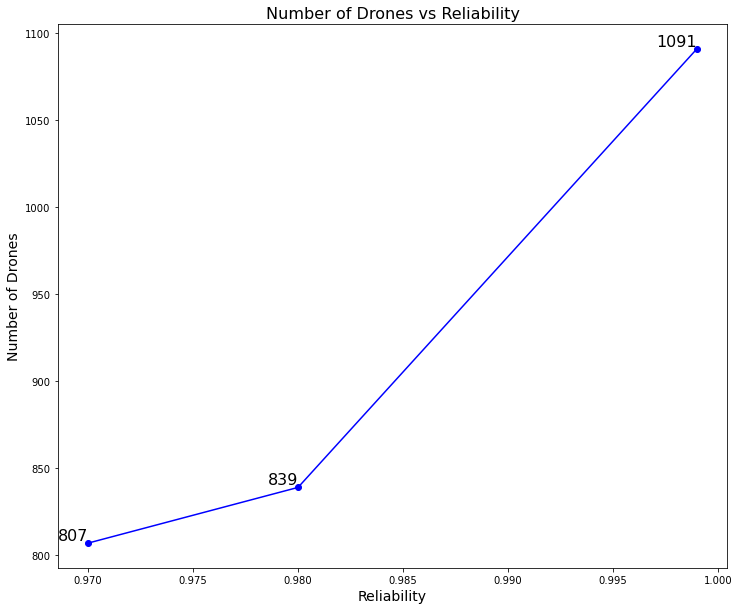

In [56]:
import matplotlib.pyplot as plt

p = [0.97, 0.98, 0.999]
number_of_drones = [807, 839, 1091]

# Plot
plt.figure(figsize=(12, 10))
plt.plot(p, number_of_drones, marker='o', color='blue', linestyle='-')
plt.title('Number of Drones vs Reliability', fontsize = 16)
plt.xlabel('Reliability', fontsize = 14)
plt.ylabel('Number of Drones', fontsize = 14)

# Add labels to points
for i in range(len(p)):
    plt.text(p[i], number_of_drones[i], f'{number_of_drones[i]}', ha='right', va='bottom', fontsize = 16)

plt.show()

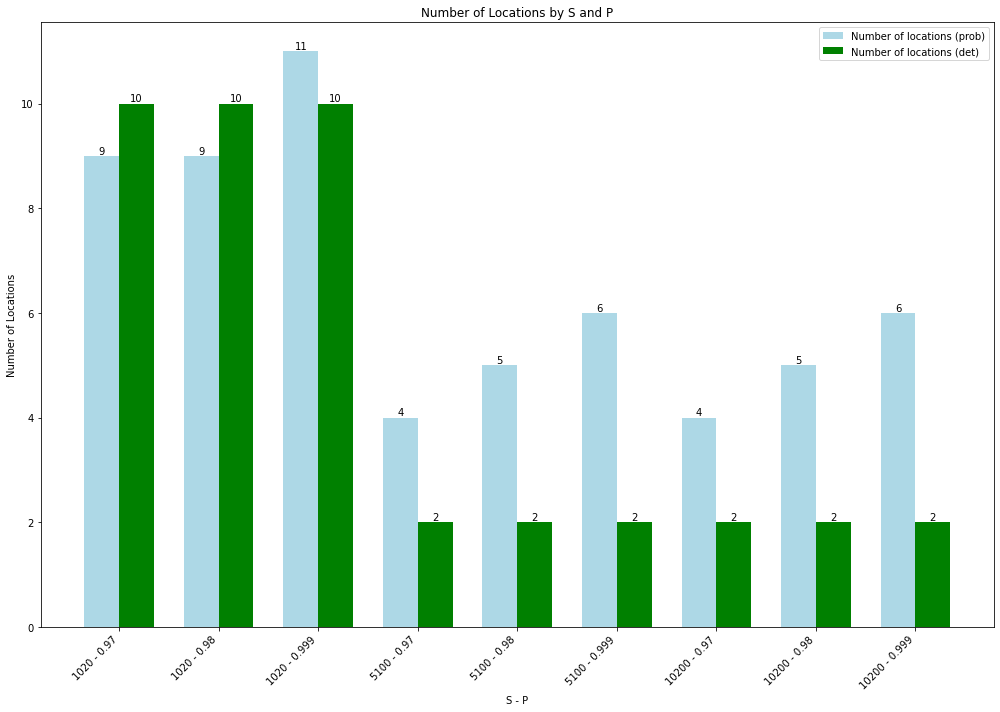

In [57]:
import numpy as np

# Data
S = [1020, 1020, 1020, 5100, 5100, 5100, 10200, 10200, 10200]
P = ['0.97', '0.98', '0.999'] * 3
locations_prob = [9, 9, 11, 4, 5, 6, 4, 5, 6]
locations_det = [10, 10, 10, 2, 2, 2, 2, 2, 2]

# Create indices for x-axis
x = np.arange(len(S))

# Width of each bar
bar_width = 0.35

# Plot
plt.figure(figsize=(14, 10))

# Plot Number of locations (prob)
bars_prob = plt.bar(x - bar_width/2, locations_prob, width=bar_width, color='lightblue', label='Number of locations (prob)')

# Plot Number of locations (det)
bars_det = plt.bar(x + bar_width/2, locations_det, width=bar_width, color='green', label='Number of locations (det)')

# Add labels and title
plt.xlabel('S - P')
plt.ylabel('Number of Locations')
plt.title('Number of Locations by S and P')
plt.xticks(x, [f'{S[i]} - {P[i]}' for i in range(len(S))], rotation=45, ha='right')
plt.legend()

# Add labels to the bars
for bars in [bars_prob, bars_det]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, height, f'{int(height)}', ha='center', va='bottom')

# Show plot
plt.tight_layout()
plt.show()

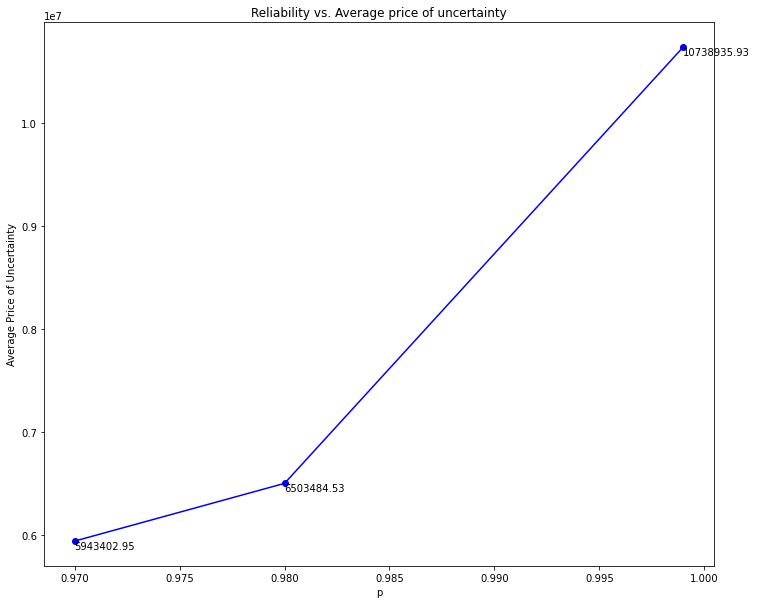

In [58]:
p = [0.97, 0.98, 0.999]
average_price = [5943402.954, 6503484.525, 10738935.93]

# Plot
plt.figure(figsize=(12, 10))
plt.plot(p, average_price, marker='o', color='blue', linestyle='-')
plt.title('Reliability vs. Average price of uncertainty')
plt.xlabel('p')
plt.ylabel('Average Price of Uncertainty')

# Add labels to points
for i in range(len(p)):
    plt.text(p[i], average_price[i], f'{average_price[i]:.2f}', ha='left', va='top')

plt.show()

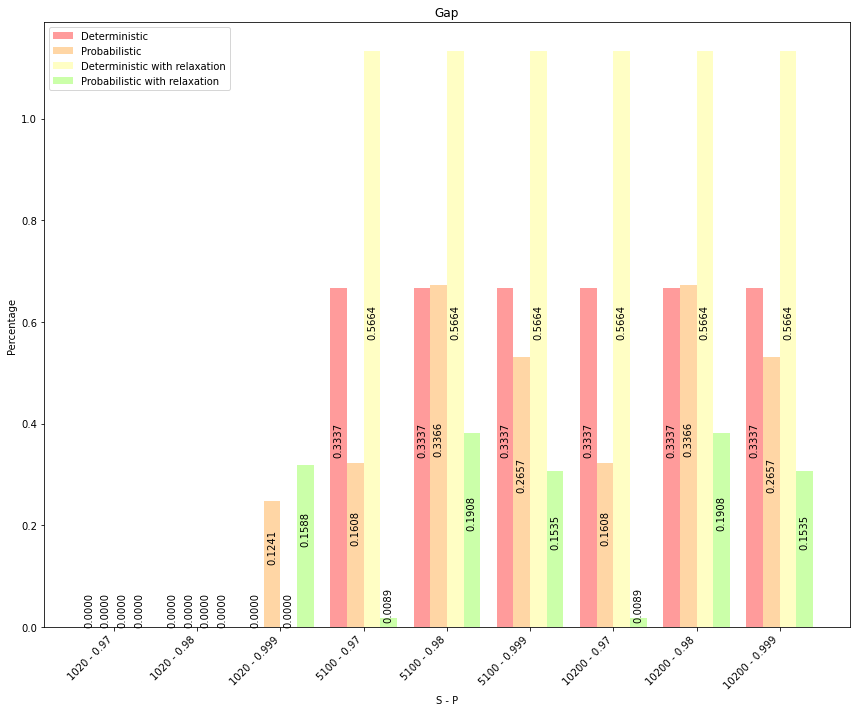

In [59]:
# Data
S = [1020, 1020, 1020, 5100, 5100, 5100, 10200, 10200, 10200]
P = ['0.97', '0.98', '0.999'] * 3
det = [0.0000, 0.0000, 0.0000, 0.6675, 0.6675, 0.6675, 0.6675, 0.6675, 0.6675]
prob = [0.0000, 0.0000, 0.2482, 0.3217, 0.6731, 0.5314, 0.3217, 0.6731, 0.5314]
det_relax = [0.0000, 0.0000, 0.0000, 1.1327, 1.1327, 1.1327, 1.1327, 1.1327, 1.1327]
prob_relax = [0.0000, 0.0000, 0.3177, 0.0177, 0.3817, 0.3070, 0.0177, 0.3817, 0.3070]

# Create indices for x-axis
x = np.arange(len(S))

# Width of each bar
bar_width = 0.2

# Plot
plt.figure(figsize=(12, 10))

# Plot Deterministic
bars_det = plt.bar(x - 1.5 * bar_width, det, width=bar_width, color='#FF9B9B', label='Deterministic')

# Plot Probabilistic
bars_prob = plt.bar(x - 0.5 * bar_width, prob, width=bar_width, color='#FFD6A5', label='Probabilistic')

# Plot Deterministic with relaxation
bars_det_relax = plt.bar(x + 0.5 * bar_width, det_relax, width=bar_width, color='#FFFEC4', label='Deterministic with relaxation')

# Plot Probabilistic with relaxation
bars_prob_relax = plt.bar(x + 1.5 * bar_width, prob_relax, width=bar_width, color='#CBFFA9', label='Probabilistic with relaxation')

# Add labels and title
plt.xlabel('S - P')
plt.ylabel('Percentage')
plt.title('Gap')
plt.xticks(x, [f'{S[i]} - {P[i]}' for i in range(len(S))], rotation=45, ha='right')
plt.legend()

# Add labels to the bars
for bars in [bars_det, bars_prob, bars_det_relax, bars_prob_relax]:
    for bar in bars:
        height = bar.get_height() / 2
        plt.text(bar.get_x() + bar.get_width()/2.0, height, f'{height:.4f}', ha='center', va='bottom', rotation = 90)

# Show plot
plt.tight_layout()
plt.show()

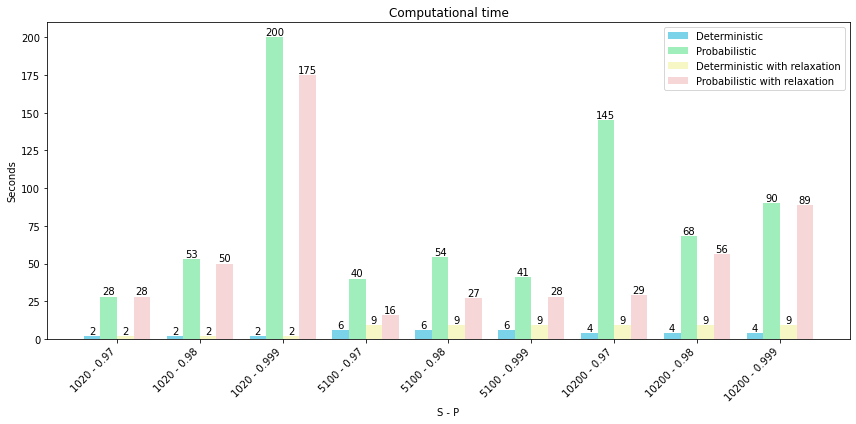

In [60]:
# Data
S = [1020, 1020, 1020, 5100, 5100, 5100, 10200, 10200, 10200]
P = ['0.97', '0.98', '0.999'] * 3
det = [2, 2, 2, 6, 6, 6, 4, 4, 4]
prob = [28, 53, 200, 40, 54, 41, 145, 68, 90]
det_relax = [2, 2, 2, 9, 9, 9, 9, 9, 9]
prob_relax = [28, 50, 175, 16, 27, 28, 29, 56, 89]

# Create indices for x-axis
x = np.arange(len(S))

# Width of each bar
bar_width = 0.2

# Plot
plt.figure(figsize=(12, 6))

# Plot Deterministic
bars_det = plt.bar(x - 1.5 * bar_width, det, width=bar_width, color='#7BD3EA', label='Deterministic')

# Plot Probabilistic
bars_prob = plt.bar(x - 0.5 * bar_width, prob, width=bar_width, color='#A1EEBD', label='Probabilistic')

# Plot Deterministic with relaxation
bars_det_relax = plt.bar(x + 0.5 * bar_width, det_relax, width=bar_width, color='#F6F7C4', label='Deterministic with relaxation')

# Plot Probabilistic with relaxation
bars_prob_relax = plt.bar(x + 1.5 * bar_width, prob_relax, width=bar_width, color='#F6D6D6', label='Probabilistic with relaxation')

# Add labels and title
plt.xlabel('S - P')
plt.ylabel('Seconds')
plt.title('Computational time')
plt.xticks(x, [f'{S[i]} - {P[i]}' for i in range(len(S))], rotation=45, ha='right')
plt.legend()

# Add labels to the bars
for bars in [bars_det, bars_prob, bars_det_relax, bars_prob_relax]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, height, f'{int(height)}', ha='center', va='bottom')

# Show plot
plt.tight_layout()
plt.show()

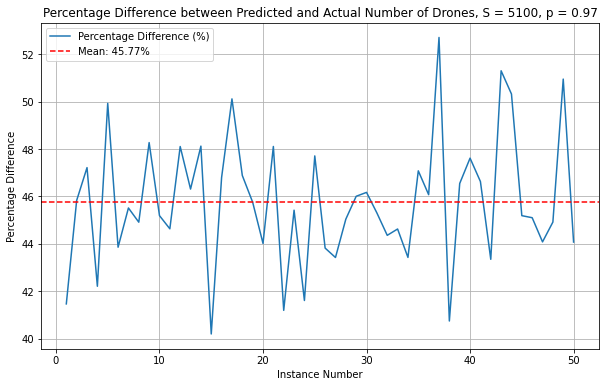

In [61]:
import matplotlib.pyplot as plt

# Provided data
model_numbers = [
    820, 816, 773, 770, 739, 700, 758, 757, 841, 759, 820, 767, 773, 694, 831, 
    735, 822, 787, 778, 727, 821, 857, 819, 834, 809, 801, 783, 817, 739, 797, 
    788, 780, 856, 753, 737, 790, 810, 837, 797, 777, 772, 789, 764, 763, 790, 
    776, 828, 797, 783, 810
]
actual_numbers = [
    480, 442, 408, 445, 370, 393, 413, 417, 435, 416, 454, 398, 415, 360, 497, 
    391, 410, 418, 422, 407, 426, 504, 447, 487, 423, 450, 443, 449, 399, 429, 
    431, 434, 474, 426, 390, 426, 383, 496, 426, 407, 412, 447, 372, 379, 433, 
    426, 463, 439, 384, 453
]

# Calculate percentage difference
percentage_difference = [((m - a) / m) * 100 for m, a in zip(model_numbers, actual_numbers)]

# Calculate mean percentage difference
mean_percentage_difference = sum(percentage_difference) / len(percentage_difference)

# Create the line graph for percentage difference
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(percentage_difference) + 1), percentage_difference, label='Percentage Difference (%)')
plt.axhline(y=mean_percentage_difference, color='r', linestyle='--', label=f'Mean: {mean_percentage_difference:.2f}%')
plt.xlabel('Instance Number')
plt.ylabel('Percentage Difference')
plt.title('Percentage Difference between Predicted and Actual Number of Drones, S = 5100, p = 0.97')
plt.legend()
plt.grid(True)
plt.show()

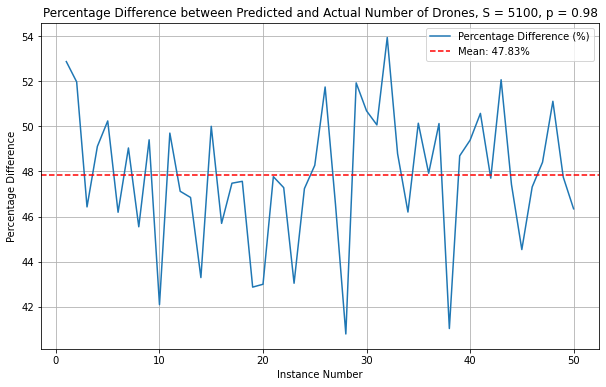

In [62]:
model_numbers = [
    872, 839, 812, 841, 842, 827, 781, 876, 836, 848, 829, 851, 777, 843, 846, 
    779, 813, 759, 807, 793, 829, 791, 755, 815, 810, 804, 825, 826, 832, 803, 
    821, 775, 781, 816, 732, 793, 818, 865, 879, 810, 787, 805, 824, 795, 824, 
    744, 816, 857, 779, 766
]

actual_numbers = [
    411, 403, 435, 428, 419, 445, 398, 477, 423, 491, 417, 450, 413, 478, 423, 
    423, 427, 398, 461, 452, 433, 417, 430, 430, 419, 388, 441, 489, 400, 396, 
    410, 357, 400, 439, 365, 413, 408, 510, 451, 410, 389, 421, 395, 418, 457, 
    392, 421, 419, 407, 411
]

# Calculate percentage difference
percentage_difference = [((m - a) / m) * 100 for m, a in zip(model_numbers, actual_numbers)]

# Calculate mean percentage difference
mean_percentage_difference = sum(percentage_difference) / len(percentage_difference)

# Create the line graph for percentage difference
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(percentage_difference) + 1), percentage_difference, label='Percentage Difference (%)')
plt.axhline(y=mean_percentage_difference, color='r', linestyle='--', label=f'Mean: {mean_percentage_difference:.2f}%')
plt.xlabel('Instance Number')
plt.ylabel('Percentage Difference')
plt.title('Percentage Difference between Predicted and Actual Number of Drones, S = 5100, p = 0.98')
plt.legend()
plt.grid(True)
plt.show()

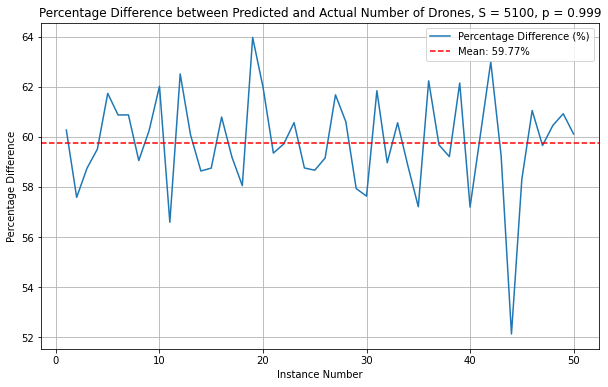

In [63]:
model_numbers = [
    1105, 1101, 1086, 1062, 1014, 1053, 1048, 1099, 1019, 1069, 1085, 1027, 1042, 
    1071, 1074, 1112, 1061, 1099, 1038, 1068, 1080, 1055, 1093, 1062, 1050, 1043, 
    1049, 1028, 1065, 1022, 1064, 987, 1070, 1013, 1096, 1091, 1116, 1064, 1070, 
    1084, 1090, 1062, 1146, 1128, 1060, 1063, 1103, 1004, 1062, 1048
]

actual_numbers = [
    439, 467, 448, 430, 388, 412, 410, 450, 405, 406, 471, 385, 416, 443, 443, 
    436, 433, 461, 374, 406, 439, 425, 431, 438, 434, 426, 402, 405, 448, 433, 
    406, 405, 422, 417, 469, 412, 450, 434, 405, 464, 435, 393, 467, 540, 442, 
    414, 445, 397, 415, 418
]

# Calculate percentage difference
percentage_difference = [((m - a) / m) * 100 for m, a in zip(model_numbers, actual_numbers)]

# Calculate mean percentage difference
mean_percentage_difference = sum(percentage_difference) / len(percentage_difference)

# Create the line graph for percentage difference
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(percentage_difference) + 1), percentage_difference, label='Percentage Difference (%)')
plt.axhline(y=mean_percentage_difference, color='r', linestyle='--', label=f'Mean: {mean_percentage_difference:.2f}%')
plt.xlabel('Instance Number')
plt.ylabel('Percentage Difference')
plt.title('Percentage Difference between Predicted and Actual Number of Drones, S = 5100, p = 0.999')
plt.legend()
plt.grid(True)
plt.show()